# Comparaison des différentes méthodes

## Récupération des données et calcul des trajectoires

### Imports

In [4]:
import sys
sys.path.append("../../")  # pour remonter à la racine depuis notebooks/

import utils as ut
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sigma = np.load("../../data/cov_matrix_sigma.npy")
CI = pd.read_csv("../../data/CarbonIntensity.csv")
CI0 = CI["CARBON_EMISSIONS_SCOPE_12_FY23"].values.reshape(-1, 1)
Green = CI["CT_TOTAL_MAX_REV"].values.reshape(-1, 1)
bench = (CI["Weight"].values / CI["Weight"].sum()).reshape(-1, 1)

### Optimisations

In [5]:
t0, t = 2023, 2050
times = np.arange(t0, t + 1)
# PAB label: Rm=0.5 dr=0.07
R_ = ut.decarbonization_pathway(t0, times, 0.5, 0.07)
# Greenness evolution
g = 1
# CM* = 7%
CMstar = np.zeros(1)
CMstar[0]=-0.07

# Carbon emissions only
x_list_CE, te_CE, CI = ut.solve_optim(R_, CI, CI0, bench, sigma, constraints_green = False, name = "CE")

#Carbon emissions and greenness
x_list_green, te_green, CI = ut.solve_optim(R_, CI, CI0, bench, sigma, Green, CMstar, g, constraints_green = True,name = "G")

# lambda = 2e-8
l = 2e-8
x_list_l, te_l, CI = ut.solve_optim_lambda(R_,CI,CI0, bench, sigma, Green, CMstar, g,l)

23


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

24


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

25


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

26


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

27


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

28


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

29


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

30


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

31


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

32


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

33


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

34


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

35


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

36


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

37


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

38


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

39


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

40


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

41


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

42


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

43


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

44


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

45


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

46


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

47


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

48


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

49


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

50


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarnin

23


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


24


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


25


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


26


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


27


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


28


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


29


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


30


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


31


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


32


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


33


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


34


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


35


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


36


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


37


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


38


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


39


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


40


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


41


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


42


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


43


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


44


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


45


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


46


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


47


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


48


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


49


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


50


c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning:

## Comparaison

### Tracking error

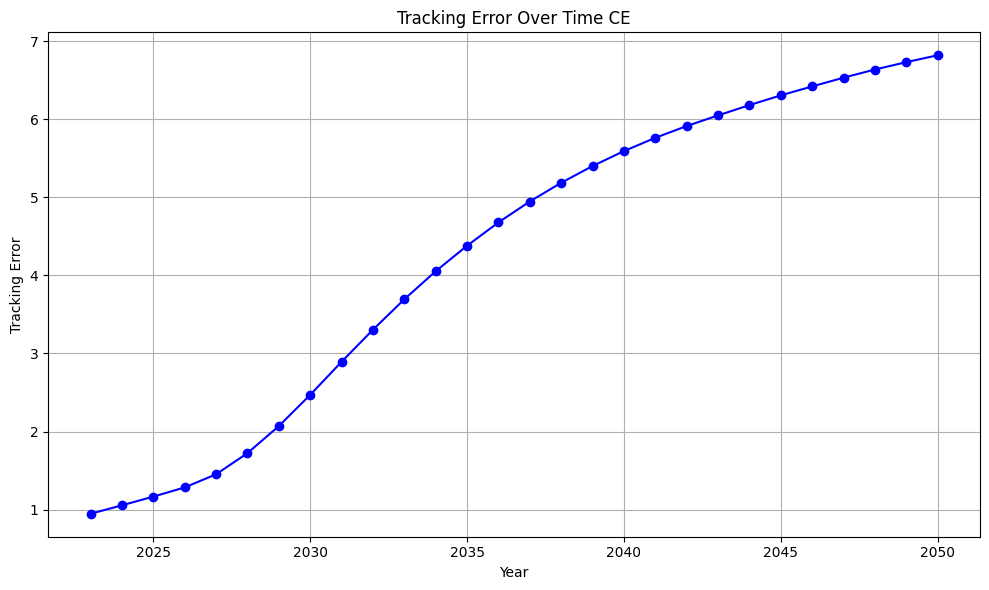

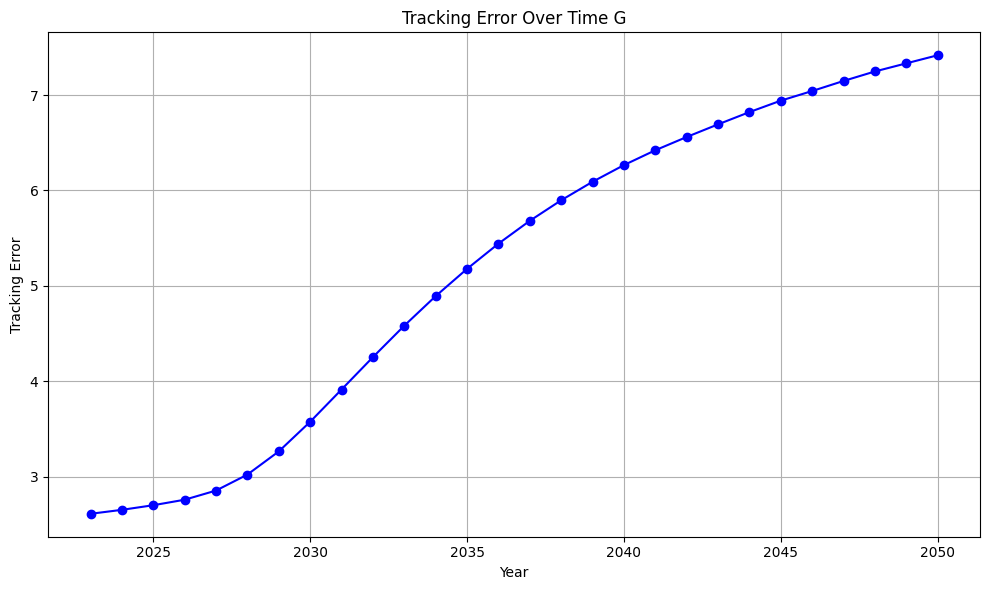

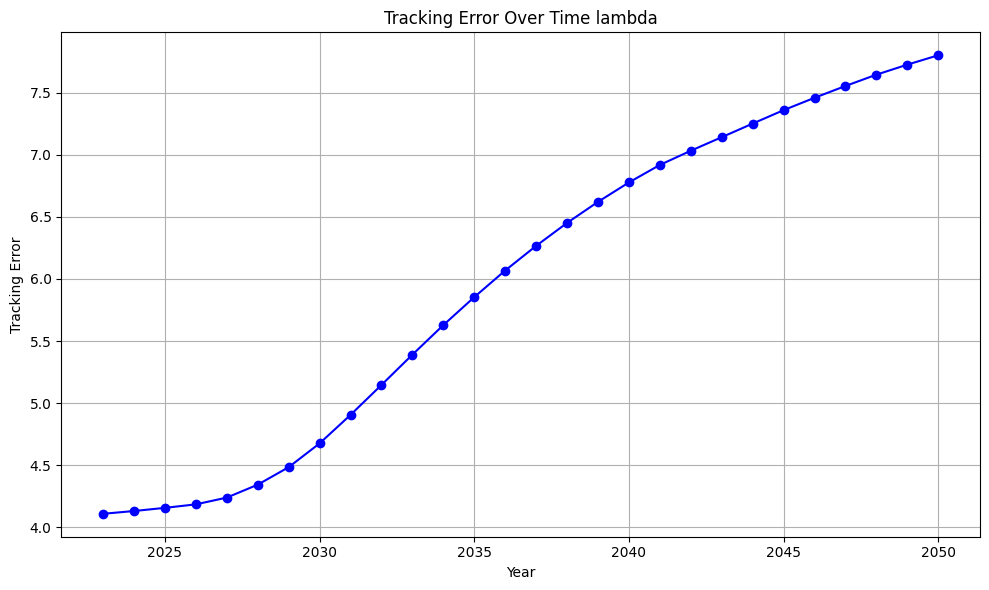

In [6]:
te_CE_array = [np.sqrt(te_CE[i][0][0])*1e4 for i in range(len(te_CE))]
te_green_array = [np.sqrt(te_green[i][0][0])*1e4 for i in range(len(te_green))]
te_l_array = [np.sqrt(te_l[i][0][0])*1e4 for i in range(len(te_l))]
ut.te_over_time(te_CE_array,times, " CE")
ut.te_over_time(te_green_array,times, " G")
ut.te_over_time(te_l_array,times, " lambda")

### Greenness

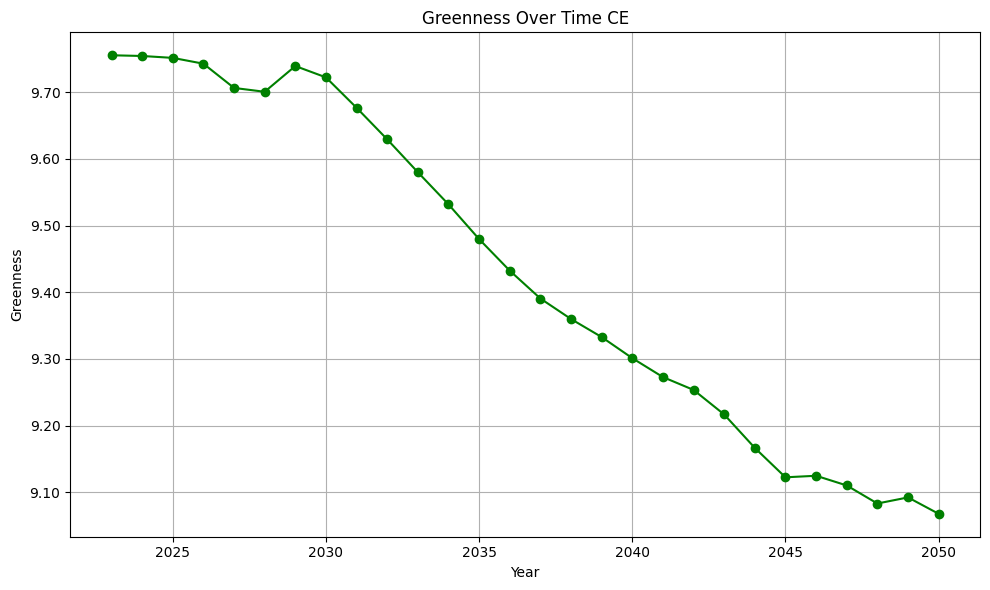

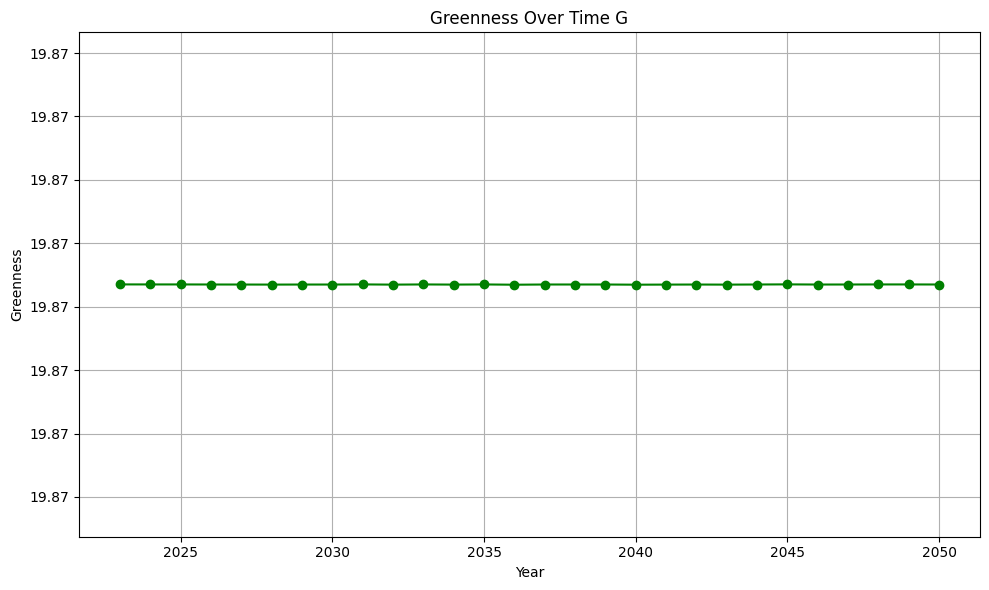

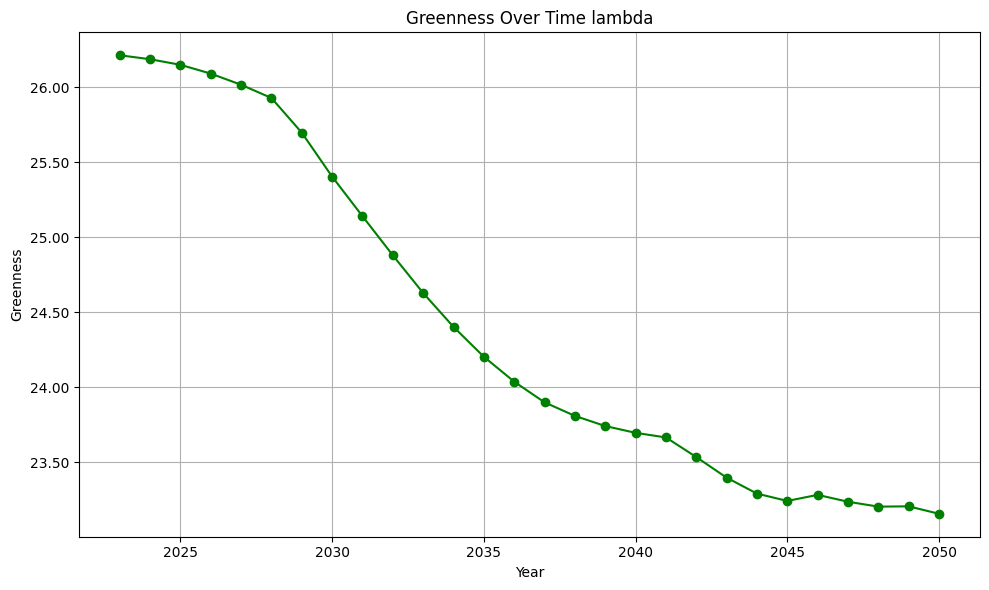

In [7]:
ut.greenness(Green,CI,times,"Weights_CE_FY"," CE")
ut.greenness(Green,CI,times,"Weights_G_FY"," G")
ut.greenness(Green,CI,times,"Weight_G_lambda_"+str(l)+"_FY"," lambda")

### Sector evolution

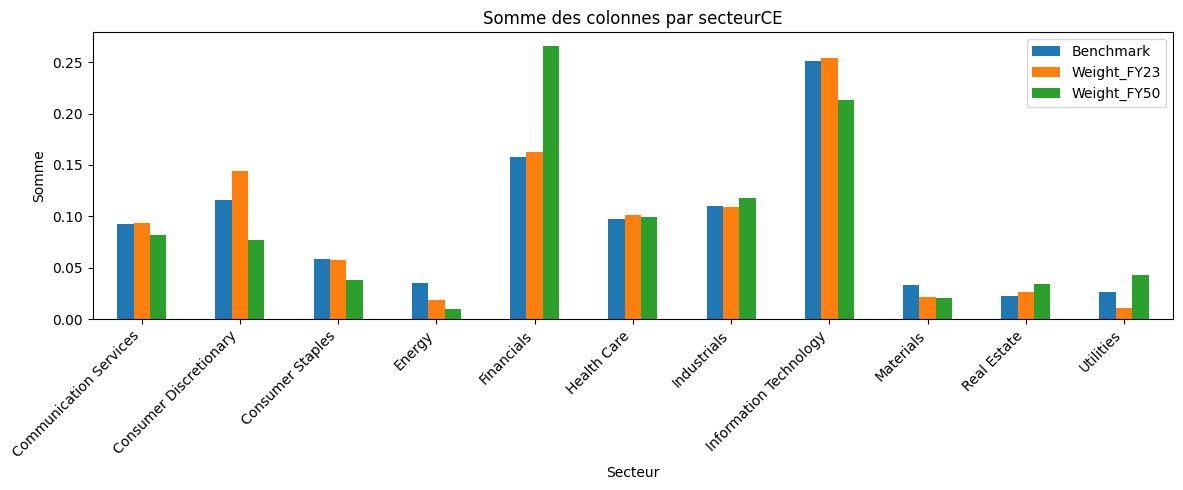

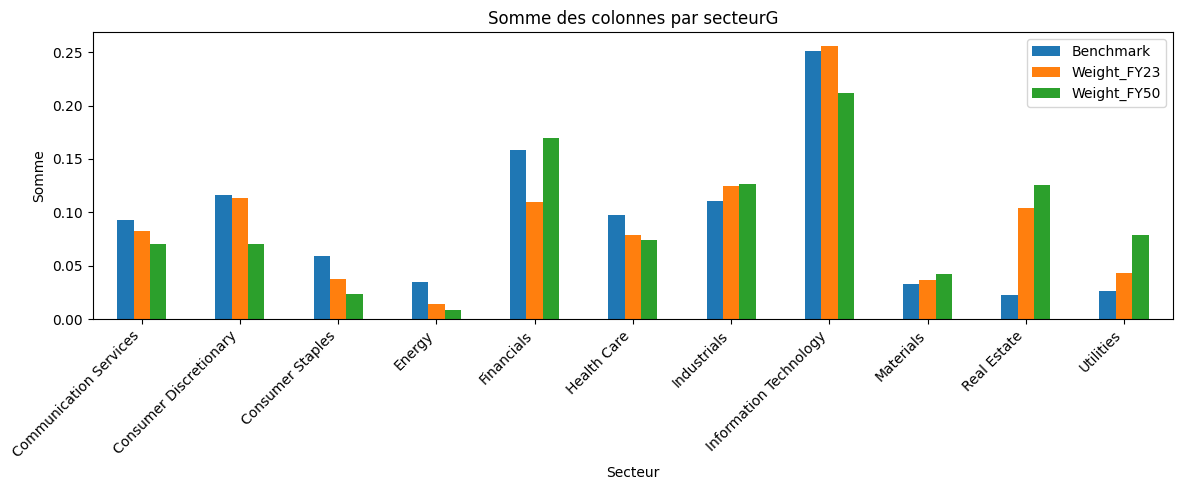

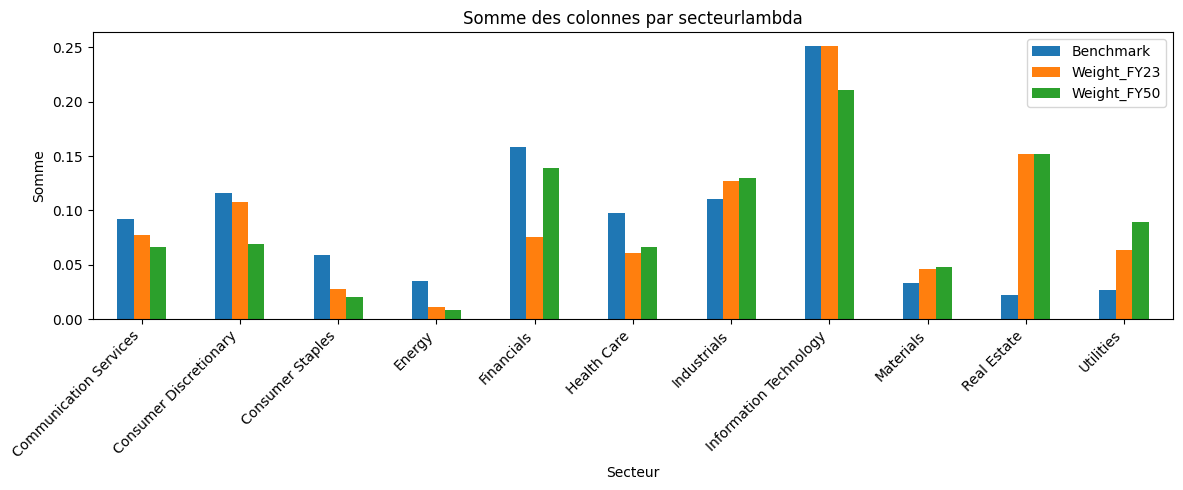

In [8]:
ut.hist_per_sector(CI,'Weights_CE_FY', "CE")
ut.hist_per_sector(CI,"Weights_G_FY", "G")
ut.hist_per_sector(CI,"Weight_G_lambda_"+str(l)+"_FY", "lambda")

### Comparison of methods

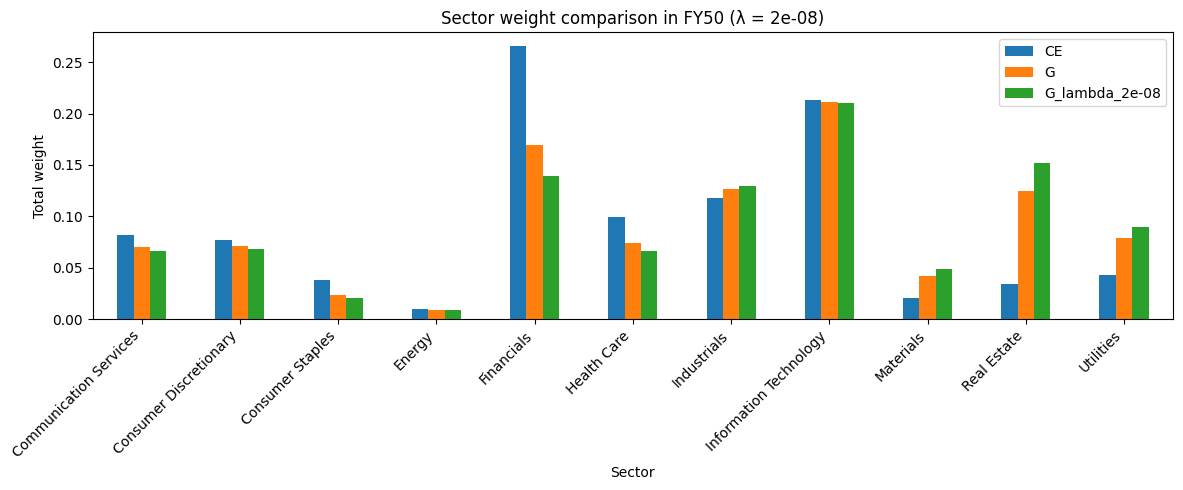

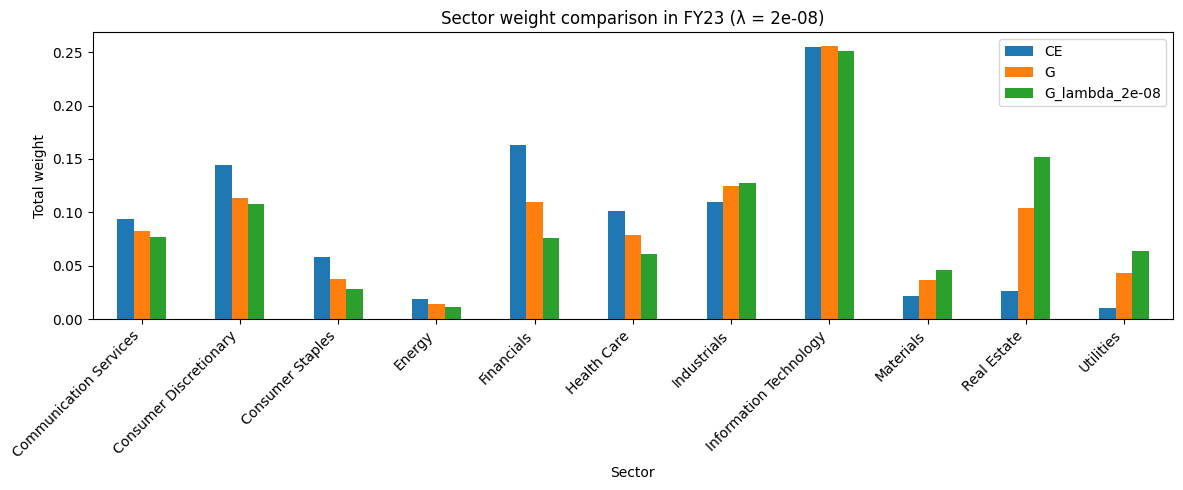

In [9]:
ut.compare_strategies_year(CI, year=2050, lambda_value=2e-8)
ut.compare_strategies_year(CI, year=2023, lambda_value=2e-8)

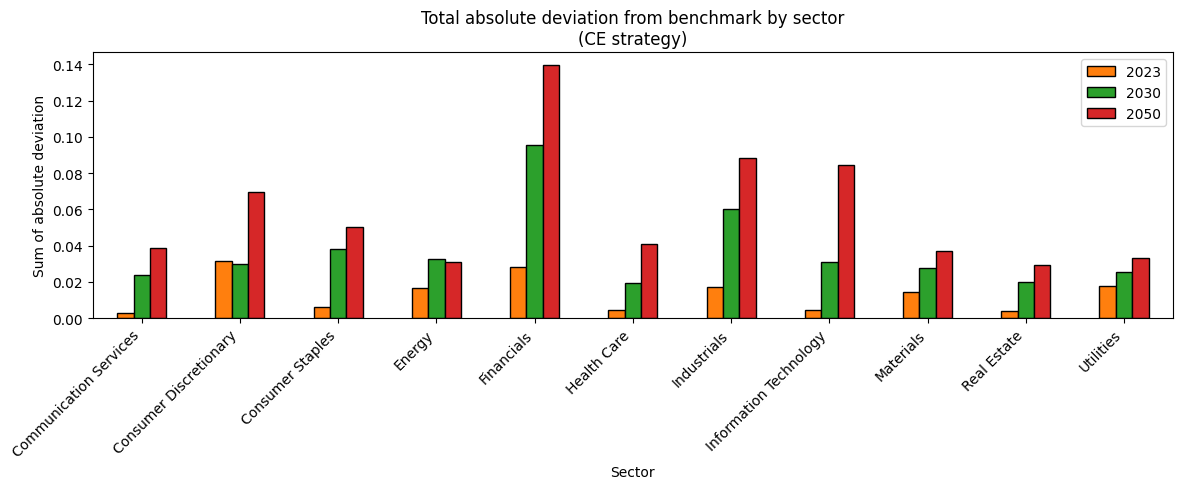

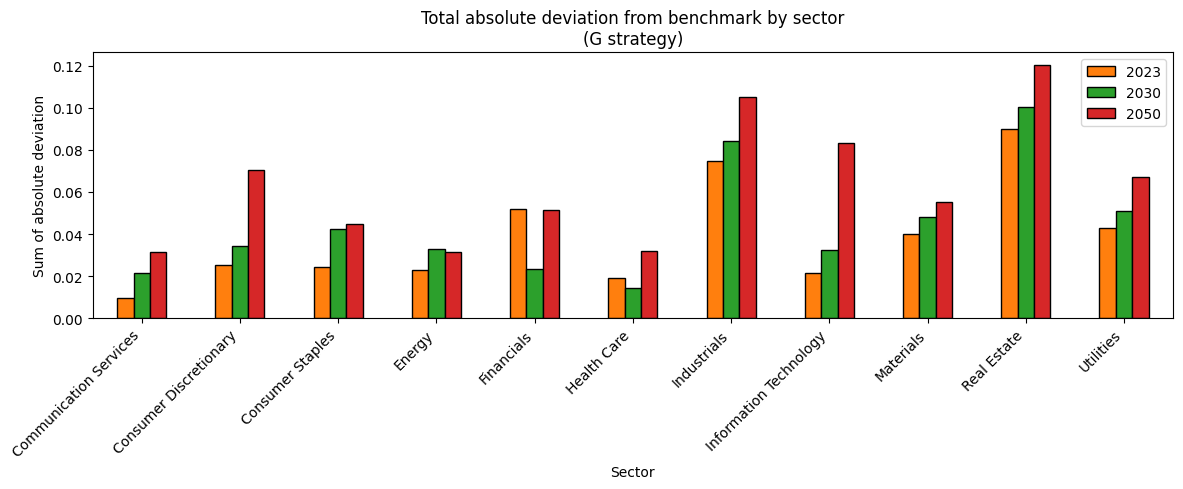

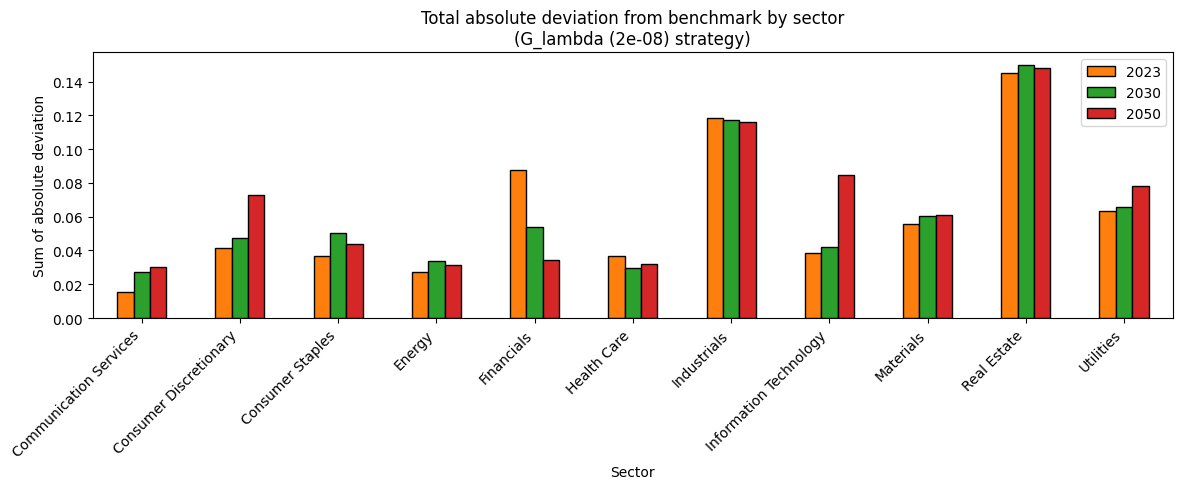

In [14]:
ut.plot_sector_deviation_from_benchmark(CI, method="CE")
ut.plot_sector_deviation_from_benchmark(CI, method="G")
ut.plot_sector_deviation_from_benchmark(CI, method="G_lambda", lambda_value=2e-8)


### Evolution of non zero weights

c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\utils.py:317: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CI[f"zero_{23 + i}"] = CI[col] > 0.00001  # Ajuster l'index des années (par exemple, FY23 = 2023)
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio\code\notebooks\../..\utils.py:317: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CI[f"zero_{23 + i}"] = CI[col] > 0.00001  # Ajuster l'index des années (par exemple, FY23 = 2023)
c:\Users\Etienne\Documents\ENSAE\PROJET\net-zero-portfolio

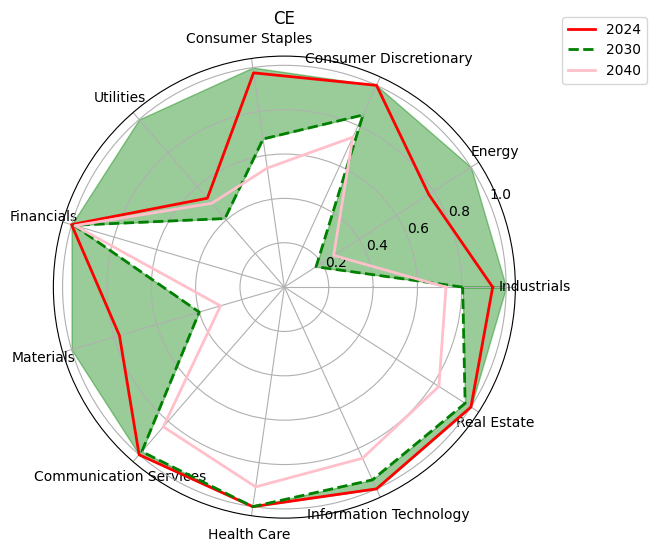

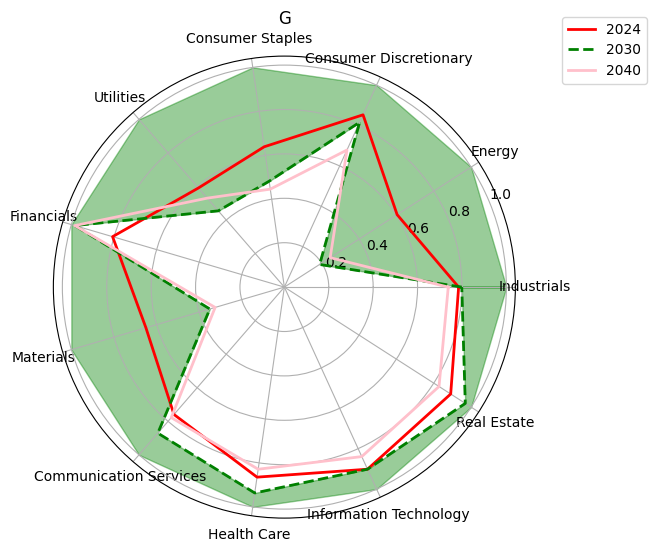

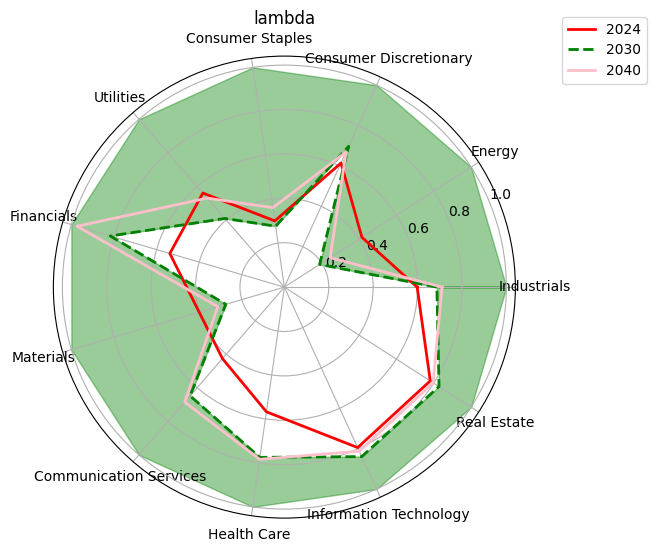

In [10]:
ut.spider_graph(CI,'Weights_CE_FY', "CE")
ut.spider_graph(CI,"Weights_G_FY", "G")
ut.spider_graph(CI,"Weight_G_lambda_"+str(l)+"_FY", "lambda")